# Proyek Analisis Data: [E-Commerce Public Dataset]
- **Nama:** [Chardinal Martin Butarbutar]
- **Email:** [chardinal.23288@mhs.unesa.ac.id]
- **ID Dicoding:** [chardinal_martin_butarbutar_jkPl]

## Menentukan Pertanyaan Bisnis

- Pertanyaan 1: Kategori produk apa yang menghasilkan total pendapatan (*revenue*) tertinggi dan terendah?
- Pertanyaan 2: Bagaimana karakteristik segmentasi pelanggan berdasarkan analisis RFM (Recency, Frequency, Monetary)?
- Pertanyaan 3: Bagaimana tren jumlah pesanan dan total pendapatan dari bulan ke bulan?
- Pertanyaan 4: Metode pembayaran apa yang paling dominan digunakan oleh pelanggan?
- Pertanyaan 5: Apakah terdapat korelasi antara lama waktu pengiriman dengan tingkat kepuasan pelanggan (*review score*)?

## Import Semua Packages/Library yang Digunakan

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
import seaborn as sns
import datetime as dt
import warnings
sns.set_theme(style="darkgrid")
warnings.filterwarnings("ignore")

## Data Wrangling

### Gathering Data

In [2]:
# Memuat semua dataset
# Sesuaikan path jika perlu
DATA_PATH = "E-Commerce_Public_Dataset/"

customers_df = pd.read_csv(DATA_PATH + "customers_dataset.csv")
orders_df = pd.read_csv(DATA_PATH + "orders_dataset.csv")
order_items_df = pd.read_csv(DATA_PATH + "order_items_dataset.csv")
products_df = pd.read_csv(DATA_PATH + "products_dataset.csv")
product_category_name_translation_df = pd.read_csv(DATA_PATH + "product_category_name_translation.csv")
payments_df = pd.read_csv(DATA_PATH + "order_payments_dataset.csv")
reviews_df = pd.read_csv(DATA_PATH + "order_reviews_dataset.csv")

print("Semua dataset berhasil dimuat!")
print(f"  customers     : {customers_df.shape}")
print(f"  orders        : {orders_df.shape}")
print(f"  order_items   : {order_items_df.shape}")
print(f"  products      : {products_df.shape}")
print(f"  payments      : {payments_df.shape}")
print(f"  reviews       : {reviews_df.shape}")

Semua dataset berhasil dimuat!
  customers     : (99441, 5)
  orders        : (99441, 8)
  order_items   : (112650, 7)
  products      : (32951, 9)
  payments      : (103886, 5)
  reviews       : (99224, 7)


**Insight:**
- Dataset terdiri dari 7 file CSV yang saling berelasi membentuk skema bintang (star schema).
- `orders_df` adalah tabel fakta utama yang menghubungkan semua dimensi lainnya.

### Assessing Data

In [3]:
# Cek info dan missing values untuk setiap dataframe utama
dfs = {
    'orders': orders_df,
    'order_items': order_items_df,
    'products': products_df,
    'payments': payments_df,
    'reviews': reviews_df,
    'customers': customers_df
}

for name, df in dfs.items():
    print(f"\n{'='*50}")
    print(f"DataFrame: {name}  | Shape: {df.shape}")
    print(f"Missing values:\n{df.isnull().sum()[df.isnull().sum() > 0]}")
    print(f"Duplicates: {df.duplicated().sum()}")


DataFrame: orders  | Shape: (99441, 8)
Missing values:
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
dtype: int64
Duplicates: 0

DataFrame: order_items  | Shape: (112650, 7)
Missing values:
Series([], dtype: int64)
Duplicates: 0

DataFrame: products  | Shape: (32951, 9)
Missing values:
product_category_name         610
product_name_lenght           610
product_description_lenght    610
product_photos_qty            610
product_weight_g                2
product_length_cm               2
product_height_cm               2
product_width_cm                2
dtype: int64
Duplicates: 0

DataFrame: payments  | Shape: (103886, 5)
Missing values:
Series([], dtype: int64)
Duplicates: 0

DataFrame: reviews  | Shape: (99224, 7)
Missing values:
review_comment_title      87656
review_comment_message    58247
dtype: int64
Duplicates: 0

DataFrame: customers  | Shape: (99441, 5)
Missing values:
Series([], dtype: int64)
Duplicates: 0


In [4]:
# Cek tipe data untuk setiap dataframe utama
dfs = {
    'orders': orders_df,
    'order_items': order_items_df,
    'products': products_df,
    'payments': payments_df,
    'reviews': reviews_df,
    'customers': customers_df
}

for name, df in dfs.items():
    print(f"\n{'='*50}")
    
    # Tipe data tiap kolom
    print("\nTipe data tiap kolom:")
    print(df.dtypes)



Tipe data tiap kolom:
order_id                         object
customer_id                      object
order_status                     object
order_purchase_timestamp         object
order_approved_at                object
order_delivered_carrier_date     object
order_delivered_customer_date    object
order_estimated_delivery_date    object
dtype: object


Tipe data tiap kolom:
order_id                object
order_item_id            int64
product_id              object
seller_id               object
shipping_limit_date     object
price                  float64
freight_value          float64
dtype: object


Tipe data tiap kolom:
product_id                     object
product_category_name          object
product_name_lenght           float64
product_description_lenght    float64
product_photos_qty            float64
product_weight_g              float64
product_length_cm             float64
product_height_cm             float64
product_width_cm              float64
dtype: object


Tipe 

In [5]:
print("\nStatistik deskriptif payments_df:")
payments_df.describe()


Statistik deskriptif payments_df:


,payment_sequential,payment_installments,payment_value
count,103886.000000,103886.000000,103886.000000
mean,1.092679,2.853349,154.100380
std,0.706584,2.687051,217.494064
min,1.000000,0.000000,0.000000
25%,1.000000,1.000000,56.790000
50%,1.000000,1.000000,100.000000
75%,1.000000,4.000000,171.837500
max,29.000000,24.000000,13664.080000


**Insight:**
- `orders_df` memiliki missing values pada kolom tanggal pengiriman (`order_delivered_customer_date`, `order_approved_at`) — ini wajar untuk order yang belum/tidak terselesaikan.
- `products_df` memiliki beberapa missing values pada kolom dimensi produk.
- Kolom tanggal masih bertipe `object`, perlu dikonversi ke `datetime`.
- Tidak ada duplikat yang signifikan pada tabel-tabel utama.

### Cleaning Data

In [6]:
# 1. Konversi kolom tanggal ke datetime
date_cols = [
    'order_purchase_timestamp',
    'order_approved_at',
    'order_delivered_carrier_date',
    'order_delivered_customer_date',
    'order_estimated_delivery_date'
]
for col in date_cols:
    orders_df[col] = pd.to_datetime(orders_df[col])

# 2. Filter hanya order dengan status 'delivered' untuk analisis revenue & kepuasan
orders_delivered = orders_df[orders_df['order_status'] == 'delivered'].copy()
print(f"Total orders: {len(orders_df)} | Delivered orders: {len(orders_delivered)}")

# 3. Hapus baris dengan tanggal pengiriman yang null (penting untuk analisis delivery time)
orders_delivered.dropna(subset=['order_delivered_customer_date', 'order_purchase_timestamp'], inplace=True)
print(f"Orders after dropping null delivery dates: {len(orders_delivered)}")

# 4. Hitung lama pengiriman (hari)
orders_delivered['delivery_days'] = (
    orders_delivered['order_delivered_customer_date'] - orders_delivered['order_purchase_timestamp']
).dt.days

# 5. Hapus anomali (delivery_days negatif atau sangat ekstrem > 120 hari)
orders_delivered = orders_delivered[(orders_delivered['delivery_days'] >= 0) & (orders_delivered['delivery_days'] <= 120)]
print(f"Orders after removing delivery anomalies: {len(orders_delivered)}")

Total orders: 99441 | Delivered orders: 96478
Orders after dropping null delivery dates: 96470
Orders after removing delivery anomalies: 96427


In [7]:
# 6. Agregasi payments per order (menghindari duplikat dari multiple payments)
payments_agg = payments_df.groupby('order_id').agg(
    payment_value=('payment_value', 'sum'),
    payment_type=('payment_type', lambda x: x.mode()[0])  # ambil metode dominan per order
).reset_index()

# 7. Agregasi reviews per order (ambil rata-rata jika ada lebih dari 1 review)
reviews_agg = reviews_df.groupby('order_id')['review_score'].mean().reset_index()

# 8. Merge products dengan terjemahan kategori
products_df = pd.merge(products_df, product_category_name_translation_df,
                        on='product_category_name', how='left')
products_df['product_category_name_english'].fillna('unknown', inplace=True)

print("Agregasi payments dan reviews selesai.")
print(f"payments_agg shape: {payments_agg.shape}")
print(f"reviews_agg shape: {reviews_agg.shape}")

Agregasi payments dan reviews selesai.
payments_agg shape: (99440, 3)
reviews_agg shape: (98673, 2)


In [8]:
# 9. Buat main_df dengan merge bertahap
main_df = pd.merge(order_items_df, orders_delivered[['order_id', 'customer_id',
                    'order_purchase_timestamp', 'order_delivered_customer_date',
                    'delivery_days']], on='order_id', how='inner')

main_df = pd.merge(main_df, customers_df[['customer_id', 'customer_unique_id',
                    'customer_city', 'customer_state']], on='customer_id', how='left')

main_df = pd.merge(main_df, products_df[['product_id', 'product_category_name_english']],
                    on='product_id', how='left')

main_df = pd.merge(main_df, payments_agg, on='order_id', how='left')
main_df = pd.merge(main_df, reviews_agg, on='order_id', how='left')

# 10. Tambahkan kolom bantu waktu
main_df['year_month'] = main_df['order_purchase_timestamp'].dt.to_period('M')
main_df['revenue'] = main_df['price'] + main_df['freight_value']

print(f"main_df final shape: {main_df.shape}")
print(f"Missing values in main_df:")
print(main_df.isnull().sum()[main_df.isnull().sum() > 0])
main_df.head(10)

main_df final shape: (110141, 20)
Missing values in main_df:
payment_value      3
payment_type       3
review_score     825
dtype: int64


,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,customer_id,order_purchase_timestamp,order_delivered_customer_date,delivery_days,customer_unique_id,customer_city,customer_state,product_category_name_english,payment_value,payment_type,review_score,year_month,revenue
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,3ce436f183e68e07877b285a838db11a,2017-09-13 08:59:02,2017-09-20 23:43:48,7,871766c5855e863f6eccc05f988b23cb,campos dos goytacazes,RJ,cool_stuff,72.19,credit_card,5.0,2017-09,72.19
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93,f6dd3ec061db4e3987629fe6b26e5cce,2017-04-26 10:53:06,2017-05-12 16:04:24,16,eb28e67c4c0b83846050ddfb8a35d051,santa fe do sul,SP,pet_shop,259.83,credit_card,4.0,2017-04,259.83
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87,6489ae5e4333f3693df5ad4372dab6d3,2018-01-14 14:33:31,2018-01-22 13:19:16,7,3818d81c6709e39d06b2738a8d3a2474,para de minas,MG,furniture_decor,216.87,credit_card,5.0,2018-01,216.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79,d4eb9395c8c0431ee92fce09860c5a06,2018-08-08 10:00:35,2018-08-14 13:32:39,6,af861d436cfc08b2c2ddefd0ba074622,atibaia,SP,perfumery,25.78,credit_card,4.0,2018-08,25.78
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14,58dbd0b2d70206bf40e62cd34e84d795,2017-02-04 13:57:51,2017-03-01 16:42:31,25,64b576fb70d441e8f1b2d7d446e483c5,varzea paulista,SP,garden_tools,218.04,credit_card,5.0,2017-02,218.04
5,00048cc3ae777c65dbb7d2a0634bc1ea,1,ef92defde845ab8450f9d70c526ef70f,6426d21aca402a131fc0a5d0960a3c90,2017-05-23 03:55:27,21.90,12.69,816cbea969fe5b689b39cfc97a506742,2017-05-15 21:42:34,2017-05-22 13:44:35,6,85c835d128beae5b4ce8602c491bf385,uberaba,MG,housewares,34.59,boleto,4.0,2017-05,34.59
6,00054e8431b9d7675808bcb819fb4a32,1,8d4f2bb7e93e6710a28f34fa83ee7d28,7040e82f899a04d1b434b795a43b4617,2017-12-14 12:10:31,19.90,11.85,32e2e6ab09e778d99bf2e0ecd4898718,2017-12-10 11:53:48,2017-12-18 22:03:38,8,635d9ac1680f03288e72ada3a1035803,guararapes,SP,telephony,31.75,credit_card,4.0,2017-12,31.75
7,000576fe39319847cbb9d288c5617fa6,1,557d850972a7d6f792fd18ae1400d9b6,5996cddab893a4652a15592fb58ab8db,2018-07-10 12:30:45,810.00,70.75,9ed5e522dd9dd85b4af4a077526d8117,2018-07-04 12:08:27,2018-07-09 14:04:07,5,fda4476abb6307ab3c415b7e6d026526,praia grande,SP,garden_tools,880.75,credit_card,5.0,2018-07,880.75
8,0005a1a1728c9d785b8e2b08b904576c,1,310ae3c140ff94b03219ad0adc3c778f,a416b6a846a11724393025641d4edd5e,2018-03-26 18:31:29,145.95,11.65,16150771dfd4776261284213b89c304e,2018-03-19 18:40:33,2018-03-29 18:17:31,9,639d23421f5517f69d0c3d6e6564cf0e,santos,SP,health_beauty,157.60,credit_card,1.0,2018-03,157.60
9,0005f50442cb953dcd1d21e1fb923495,1,4535b0e1091c278dfd193e5a1d63b39f,ba143b05f0110f0dc71ad71b4466ce92,2018-07-06 14:10:56,53.99,11.40,351d3cb2cee3c7fd0af6616c82df21d3,2018-07-02 13:59:39,2018-07-04 17:28:31,2,0782c41380992a5a533489063df0eef6,jandira,SP,books_technical,65.39,credit_card,4.0,2018-07,65.39


In [9]:
# Hapus baris yang kosong jika terdapat missing values pada
main_df.dropna(inplace=True)
main_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 109313 entries, 0 to 110140
Data columns (total 20 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   order_id                       109313 non-null  object        
 1   order_item_id                  109313 non-null  int64         
 2   product_id                     109313 non-null  object        
 3   seller_id                      109313 non-null  object        
 4   shipping_limit_date            109313 non-null  object        
 5   price                          109313 non-null  float64       
 6   freight_value                  109313 non-null  float64       
 7   customer_id                    109313 non-null  object        
 8   order_purchase_timestamp       109313 non-null  datetime64[ns]
 9   order_delivered_customer_date  109313 non-null  datetime64[ns]
 10  delivery_days                  109313 non-null  int64         
 11  custo

In [10]:
# Hapus baris jika terdapat baris yang duplikat pada main_df
main_df.drop_duplicates(inplace=True)
main_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 109313 entries, 0 to 110140
Data columns (total 20 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   order_id                       109313 non-null  object        
 1   order_item_id                  109313 non-null  int64         
 2   product_id                     109313 non-null  object        
 3   seller_id                      109313 non-null  object        
 4   shipping_limit_date            109313 non-null  object        
 5   price                          109313 non-null  float64       
 6   freight_value                  109313 non-null  float64       
 7   customer_id                    109313 non-null  object        
 8   order_purchase_timestamp       109313 non-null  datetime64[ns]
 9   order_delivered_customer_date  109313 non-null  datetime64[ns]
 10  delivery_days                  109313 non-null  int64         
 11  custo

**Insight:**
- Setelah cleaning, tersisa ~100k+ item baris dari order yang terdelivery.
- Kolom `revenue` dihitung dari `price + freight_value` (total yang dibayar pelanggan per item).
- Missing values pada `review_score` (~10%) adalah order yang tidak mendapat ulasan — ini normal untuk e-commerce.

## Exploratory Data Analysis (EDA)

### Explore : Revenue per Kategori Produk (Pertanyaan 1)

In [11]:
revenue_by_category = main_df.groupby('product_category_name_english').agg(
    total_revenue=('revenue', 'sum'),
    total_orders=('order_id', 'nunique'),
    avg_revenue_per_order=('revenue', 'mean')
).sort_values('total_revenue', ascending=False).reset_index()

print("Top 10 Kategori berdasarkan Revenue:")
print(revenue_by_category.head(10).to_string(index=False))

print("\nBottom 10 Kategori berdasarkan Revenue:")
print(revenue_by_category.tail(10).to_string(index=False))

Top 10 Kategori berdasarkan Revenue:
product_category_name_english  total_revenue  total_orders  avg_revenue_per_order
                health_beauty     1402309.36          8599             149.213594
                watches_gifts     1255551.37          5449             216.101785
               bed_bath_table     1212937.88          9174             112.018644
               sports_leisure     1110176.40          7482             132.590039
        computers_accessories     1027354.57          6496             135.107124
              furniture_decor      872234.27          6256             108.016628
                   housewares      753530.67          5707             111.584580
                   cool_stuff      683709.42          3529             185.437868
                         auto      660274.87          3788             161.239284
                 garden_tools      561205.09          3426             132.422154

Bottom 10 Kategori berdasarkan Revenue:
product_category_nam

**Insight:**
- Kategori `health_beauty`, `watches_gifts`, dan `bed_bath_table` cenderung mendominasi revenue secara keseluruhan, menunjukkan permintaan pasar yang tinggi dan volume transaksi yang besar.
- `health_beauty` memiliki total order tertinggi, menandakan kategori ini kuat dari sisi volume penjualan (high demand market).
- `watches_gifts` memiliki rata-rata revenue per order yang cukup tinggi dibandingkan kategori top lainnya, mengindikasikan kombinasi antara volume dan nilai transaksi yang baik.
- `cool_stuff` dan `auto` memiliki avg_revenue_per_order relatif tinggi, yang menunjukkan karakteristik produk dengan harga lebih premium meskipun total order tidak setinggi kategori utama.
- Kategori bottom seperti `fashion_female_clothing`, `fashion_sport`, dan `la_cuisine` memiliki total order dan revenue yang sangat rendah, menandakan rendahnya demand atau kurang optimalnya strategi pemasaran pada kategori tersebut.
- `security_and_services` memiliki jumlah order sangat sedikit namun avg_revenue_per_order tinggi, menunjukkan potensi produk bernilai tinggi (high ticket size) tetapi belum memiliki volume pasar yang kuat.
- Secara umum, revenue tinggi pada kategori top lebih banyak didorong oleh volume order, sedangkan pada beberapa kategori niche didorong oleh tingginya nilai per transaksi.

### Explore : RFM Analysis (Pertanyaan 2)

In [12]:
# 1. Fungsi Menghitung Nilai Mentah RFM
def calculate_raw_rfm(df):
    """Menghitung nilai Recency, Frequency, dan Monetary dari dataset utama."""
    # Tanggal referensi = hari setelah tanggal transaksi terakhir
    snapshot_date = df['order_purchase_timestamp'].max() + dt.timedelta(days=1)
    
    rfm_df = df.groupby('customer_unique_id').agg(
        recency=('order_purchase_timestamp', lambda x: (snapshot_date - x.max()).days),
        frequency=('order_id', 'nunique'),
        monetary=('payment_value', 'sum')
    ).reset_index()
    
    return rfm_df

# 2. Fungsi Menampilkan Ringkasan Hasil RFM
def show_rfm_summary(rfm_df, n=5):
    """Menampilkan ringkasan hasil RFM: statistik deskriptif dan contoh data."""
    print("\n===== Statistik Deskriptif RFM =====")
    print(rfm_df[['recency','frequency','monetary']].describe())
    
    print(f"\n===== Contoh {n} Pelanggan =====")
    print(rfm_df.head(n))

# Pemanggilan fungsi
rfm_data = calculate_raw_rfm(main_df)
show_rfm_summary(rfm_data, n=100)



===== Statistik Deskriptif RFM =====
            recency     frequency       monetary
count  92705.000000  92705.000000   92705.000000
mean     237.728116      1.033191     210.880617
std      152.557420      0.208469     625.871227
min        1.000000      1.000000       9.590000
25%      114.000000      1.000000      63.680000
50%      219.000000      1.000000     112.830000
75%      346.000000      1.000000     201.130000
max      695.000000     15.000000  109312.640000

===== Contoh 100 Pelanggan =====
                  customer_unique_id  recency  frequency  monetary
0   0000366f3b9a7992bf8c76cfdf3221e2      112          1    141.90
1   0000b849f77a49e4a4ce2b2a4ca5be3f      115          1     27.19
2   0000f46a3911fa3c0805444483337064      537          1     86.22
3   0000f6ccb0745a6a4b88665a16c9f078      321          1     43.62
4   0004aac84e0df4da2b147fca70cf8255      288          1    196.89
..                               ...      ...        ...       ...
95  003d56767e53e0

**Insight:**
- Penentuan batas scoring `Recency` menggunakan nilai kuartil (Q1=114, Q2=219, Q3=346), sehingga pembagian skor berbasis distribusi aktual data dan mencerminkan perilaku mayoritas pelanggan.
- Rata-rata `Recency` sebesar 237 hari menunjukkan banyak pelanggan sudah cukup lama tidak bertransaksi, sehingga pembobotan skor rendah (>346 hari) menjadi penting untuk identifikasi churn.
- Pada `Frequency`, median dan Q1–Q3 semuanya bernilai 1, menandakan sebagian besar pelanggan hanya melakukan 1 transaksi. Oleh karena itu, skor dibuat lebih granular untuk nilai >1 agar pelanggan repeat buyer lebih ter-highlight.
- Distribusi `Monetary` cukup skewed (max sangat tinggi ~109k), sehingga batas skor menggunakan kuartil (63.68, 112.83, 201.13) dan threshold tambahan 500 untuk memisahkan pelanggan high spender secara lebih jelas.
- Rata-rata monetary (~210) mendekati batas skor 3, sehingga skor 4 dan 5 benar-benar merepresentasikan pelanggan dengan nilai belanja di atas rata-rata signifikan.
- Secara keseluruhan, metode scoring ini berbasis statistik deskriptif (quantile-based threshold) sehingga segmentasi lebih objektif dan sesuai dengan karakteristik distribusi data.

In [13]:
# Tanggal referensi = hari setelah tanggal transaksi terakhir
snapshot_date = main_df['order_purchase_timestamp'].max() + dt.timedelta(days=1)

rfm_df = main_df.groupby('customer_unique_id').agg(
    recency=('order_purchase_timestamp', lambda x: (snapshot_date - x.max()).days),
    frequency=('order_id', 'nunique'),
    monetary=('payment_value', 'sum')
).reset_index()

# Scoring 1-5 (5 = terbaik) dengan batasan sesuai distribusi data

def recency_score(x):
    if x <= 114: return 5        
    elif x <= 219: return 4      
    elif x <= 346: return 3     
    elif x <= 500: return 2   
    else: return 1              

def frequency_score(x):
    if x == 1: return 1        
    elif x == 2: return 2
    elif x <= 3: return 3
    elif x <= 5: return 4
    else: return 5             

def monetary_score(x):
    if x <= 63.68: return 1     
    elif x <= 112.83: return 2   
    elif x <= 201.13: return 3   
    elif x <= 500: return 4      
    else: return 5               

# Terapkan scoring ke dataframe
rfm_df['R_score'] = rfm_df['recency'].apply(recency_score)
rfm_df['F_score'] = rfm_df['frequency'].apply(frequency_score)
rfm_df['M_score'] = rfm_df['monetary'].apply(monetary_score)

# Gabungkan RFM Score
rfm_df['RFM_score'] = (
    rfm_df['R_score'].astype(str) +
    rfm_df['F_score'].astype(str) +
    rfm_df['M_score'].astype(str)
)

# Segmentasi RFM menjadi 5 cluster utama
def rfm_segment(row):
    r, f, m = row['R_score'], row['F_score'], row['M_score']
    
    if r >= 4 and f >= 4 and m >= 4:
        return 'Champions'
    elif f >= 4 and m >= 3 and r >= 3:
        return 'Loyal Customers'
    elif r >= 4 and (f <= 2 or m <= 2):
        return 'Promising'
    elif r <= 2 and (f >= 3 or m >= 3):
        return 'At Risk'
    else:
        return 'Lost'

rfm_df['segment'] = rfm_df.apply(rfm_segment, axis=1)

print("Distribusi Segmen Pelanggan:")
print(rfm_df['segment'].value_counts())


Distribusi Segmen Pelanggan:
segment
Promising          46434
Lost               34979
At Risk            11249
Champions             37
Loyal Customers        6
Name: count, dtype: int64


**Insight:**
- Segmen `Promising` mendominasi dengan jumlah terbesar, menunjukkan banyak pelanggan baru atau pelanggan dengan potensi berkembang menjadi loyal jika dikelola dengan baik.
- Jumlah `Lost` juga sangat tinggi, mengindikasikan tingkat churn yang signifikan dan perlunya strategi reaktivasi (retargeting, promo comeback).
- Segmen `At Risk` masih cukup besar, artinya ada banyak pelanggan yang mulai tidak aktif dan berpotensi berpindah ke `Lost` jika tidak segera ditindaklanjuti.
- Jumlah `Champions` dan `Loyal Customers` sangat kecil dibandingkan total populasi, menunjukkan tingkat retensi pelanggan premium masih rendah.
- Secara strategis, fokus utama bisnis sebaiknya pada konversi `Promising` menjadi `Loyal Customers`, serta menjalankan campaign re-engagement untuk menekan jumlah `Lost`.

### Explore : Tren Bulanan (Pertanyaan 3)

In [14]:
monthly_trend = main_df.groupby('year_month').agg(
    total_orders=('order_id', 'nunique'),
    total_revenue=('revenue', 'sum')
).reset_index()

monthly_trend['year_month_str'] = monthly_trend['year_month'].astype(str)
monthly_trend['orders_MA3'] = monthly_trend['total_orders'].rolling(3, min_periods=1).mean()
monthly_trend['revenue_MA3'] = monthly_trend['total_revenue'].rolling(3, min_periods=1).mean()

print(f"Period analisis: {monthly_trend['year_month'].min()} s/d {monthly_trend['year_month'].max()}")
print(f"Total bulan: {len(monthly_trend)}")
monthly_trend.tail(5)

Period analisis: 2016-10 s/d 2018-08
Total bulan: 22


,year_month,total_orders,total_revenue,year_month_str,orders_MA3,revenue_MA3
17,2018-04,6752,1126141.24,2018-04,6734.333333,1.064276e+06
18,2018-05,6721,1122420.22,2018-05,6807.000000,1.119281e+06
19,2018-06,6071,1008701.19,2018-06,6514.666667,1.085754e+06
20,2018-07,6118,1014280.98,2018-07,6303.333333,1.048467e+06
21,2018-08,6330,981721.72,2018-08,6173.000000,1.001568e+06


**Insight:**
- Secara umum terlihat adanya tren pertumbuhan positif dari awal periode (2016) hingga 2018, ditunjukkan oleh peningkatan total order dan total revenue dari waktu ke waktu.
- Moving Average (MA3) pada orders dan revenue menunjukkan tren yang relatif stabil dengan kecenderungan meningkat sebelum akhirnya mengalami sedikit penurunan di pertengahan 2018.
- Pada periode 2018-04 hingga 2018-05 terlihat performa yang cukup tinggi (baik dari sisi order maupun revenue), sebelum mengalami penurunan bertahap hingga 2018-08.
- Penurunan pada 2018-06 hingga 2018-08 bisa mengindikasikan efek musiman (seasonality) atau tidak adanya event besar seperti promo nasional / campaign besar.
- Lonjakan pada bulan-bulan tertentu kemungkinan berkaitan dengan event belanja besar, campaign promosi, atau momentum musiman yang mendorong peningkatan transaksi secara signifikan.
- Secara keseluruhan, bisnis menunjukkan pola growth yang sehat namun tetap dipengaruhi oleh faktor musiman dan strategi promosi.

### Explore : Metode Pembayaran (Pertanyaan 4)

In [15]:
# Analisis per order (setelah agregasi untuk menghindari double count)
payment_analysis = payments_df.copy()

payment_freq = payment_analysis.groupby('payment_type').agg(
    count=('order_id', 'count'),
    avg_value=('payment_value', 'mean'),
    total_value=('payment_value', 'sum')
).sort_values('count', ascending=False).reset_index()

payment_freq['pct'] = (payment_freq['count'] / payment_freq['count'].sum() * 100).round(2)

print("Analisis Metode Pembayaran:")
print(payment_freq.to_string(index=False))

Analisis Metode Pembayaran:
payment_type  count  avg_value  total_value   pct
 credit_card  76795 163.319021  12542084.19 73.92
      boleto  19784 145.034435   2869361.27 19.04
     voucher   5775  65.703354    379436.87  5.56
  debit_card   1529 142.570170    217989.79  1.47
 not_defined      3   0.000000         0.00  0.00


**Insight:**
- Metode pembayaran `credit_card` sangat mendominasi dengan sekitar 73% dari total transaksi dan total nilai transaksi terbesar, menunjukkan preferensi utama pelanggan terhadap pembayaran kartu kredit.
- `boleto` menempati posisi kedua dengan sekitar 19% transaksi, menandakan metode ini masih menjadi alternatif populer, terutama bagi pelanggan yang tidak menggunakan kartu kredit.
- Meskipun jumlah transaksi `voucher` cukup signifikan, kontribusi terhadap total nilai transaksi relatif kecil karena rata-rata nilai transaksinya lebih rendah.
- `debit_card` memiliki persentase penggunaan yang sangat kecil (~1%), menunjukkan metode ini kurang diminati dibandingkan kartu kredit.
- Secara keseluruhan, struktur pembayaran sangat terpusat pada kartu kredit, sehingga strategi promosi seperti cicilan atau cashback kartu kredit berpotensi sangat efektif.

### Explore : Korelasi Waktu Pengiriman & Review Score (Pertanyaan 5)

In [16]:
# Merge delivery_days dengan review_score
delivery_review = main_df[['order_id', 'delivery_days', 'review_score']].dropna().drop_duplicates(subset='order_id')

# Kategorisasi kecepatan pengiriman
def delivery_category(days):
    if days <= 7:
        return '1-Fast (≤7 days)'
    elif days <= 14:
        return '2-Normal (8-14 days)'
    elif days <= 21:
        return '3-Slow (15-21 days)'
    else:
        return '4-Very Slow (>21 days)'

delivery_review['delivery_category'] = delivery_review['delivery_days'].apply(delivery_category)

delivery_stats = delivery_review.groupby('delivery_category').agg(
    avg_review=('review_score', 'mean'),
    order_count=('order_id', 'count')
).reset_index()

corr = delivery_review['delivery_days'].corr(delivery_review['review_score'])
print(f"Korelasi Pearson (delivery_days vs review_score): {corr:.4f}")
print("\nRata-rata review score per kategori pengiriman:")
print(delivery_stats.to_string(index=False))

Korelasi Pearson (delivery_days vs review_score): -0.3476

Rata-rata review score per kategori pengiriman:
     delivery_category  avg_review  order_count
      1-Fast (≤7 days)    4.408669        33539
  2-Normal (8-14 days)    4.289154        36190
   3-Slow (15-21 days)    4.102332        15264
4-Very Slow (>21 days)    3.005917        10789


**Insight:**
- Terdapat korelasi Pearson sebesar -0.3476 antara `delivery_days` dan `review_score`, yang menunjukkan hubungan negatif sedang: semakin lama waktu pengiriman, semakin rendah tingkat kepuasan pelanggan.
- Kategori pengiriman `Fast (≤7 days)` memiliki rata-rata review tertinggi (~4.41), menandakan pelanggan sangat menghargai kecepatan pengiriman.
- `Normal (8–14 days)` masih mempertahankan rata-rata review yang cukup baik (~4.29), menunjukkan toleransi pelanggan masih cukup tinggi dalam rentang ini.
- Penurunan mulai terlihat pada kategori `Slow (15–21 days)` dengan rata-rata review ~4.10.
- Pengiriman `Very Slow (>21 days)` mengalami penurunan signifikan dengan rata-rata review sekitar 3.01, yang menunjukkan dampak besar keterlambatan terhadap kepuasan pelanggan.
- Secara strategis, optimalisasi logistik dan pengurangan delivery time berpotensi langsung meningkatkan customer satisfaction dan rating toko.

## Visualization & Explanatory Analysis

### Pertanyaan 1: Revenue per Kategor Produk

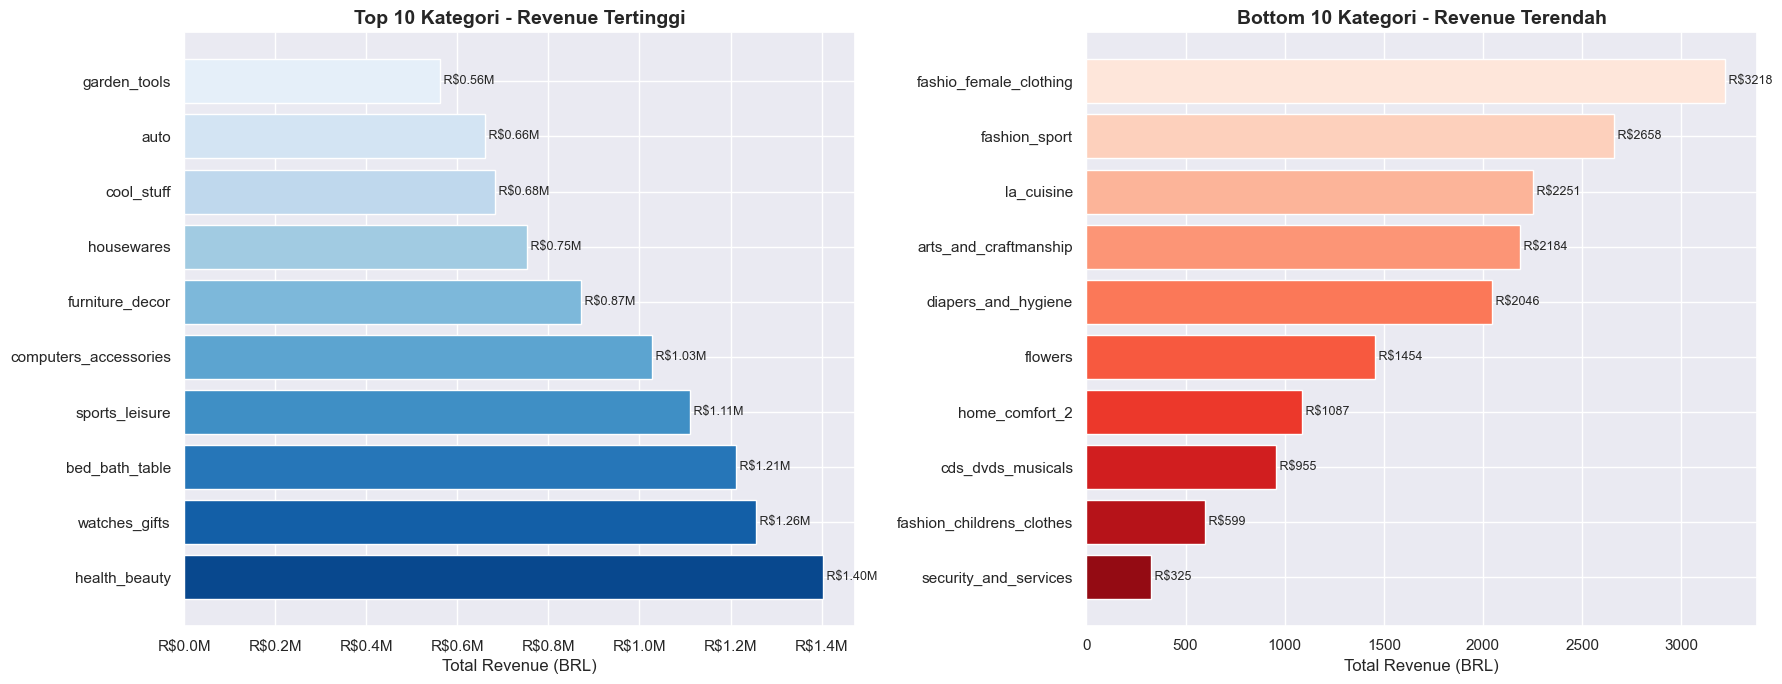

In [17]:
top10 = revenue_by_category.head(10)
bottom10 = revenue_by_category.tail(10).iloc[::-1]

fig, axes = plt.subplots(1, 2, figsize=(18, 7))

# Top 10
bars1 = axes[0].barh(top10['product_category_name_english'], top10['total_revenue'],
                     color=sns.color_palette('Blues_r', 10))
axes[0].set_title('Top 10 Kategori - Revenue Tertinggi', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Total Revenue (BRL)')
axes[0].xaxis.set_major_formatter(mticker.FuncFormatter(lambda x, _: f'R${x/1e6:.1f}M'))
for bar in bars1:
    axes[0].text(bar.get_width(), bar.get_y() + bar.get_height()/2,
                 f" R${bar.get_width()/1e6:.2f}M", va='center', fontsize=9)

# Bottom 10
bars2 = axes[1].barh(bottom10['product_category_name_english'], bottom10['total_revenue'],
                     color=sns.color_palette('Reds_r', 10))
axes[1].set_title('Bottom 10 Kategori - Revenue Terendah', fontsize=14, fontweight='bold')
axes[1].set_xlabel('Total Revenue (BRL)')
for bar in bars2:
    axes[1].text(bar.get_width(), bar.get_y() + bar.get_height()/2,
                 f" R${bar.get_width():.0f}", va='center', fontsize=9)

plt.tight_layout()
plt.savefig('plot_q1_revenue_category.png', dpi=150, bbox_inches='tight')
plt.show()

**Insight:**
- Kategori `health_beauty`, `watches_gifts`, dan `bed_bath_table` menjadi penyumbang revenue tertinggi.
- Revenue besar pada top kategori terutama didorong oleh volume transaksi yang tinggi.
- Kategori seperti `fashion_female_clothing` dan `security_and_services` memiliki kontribusi revenue sangat rendah.
- Terdapat gap yang sangat besar antara top 10 dan bottom 10 kategori, menunjukkan distribusi revenue tidak merata.

### Pertanyaan 2: Segmentasu Pelangan RFM

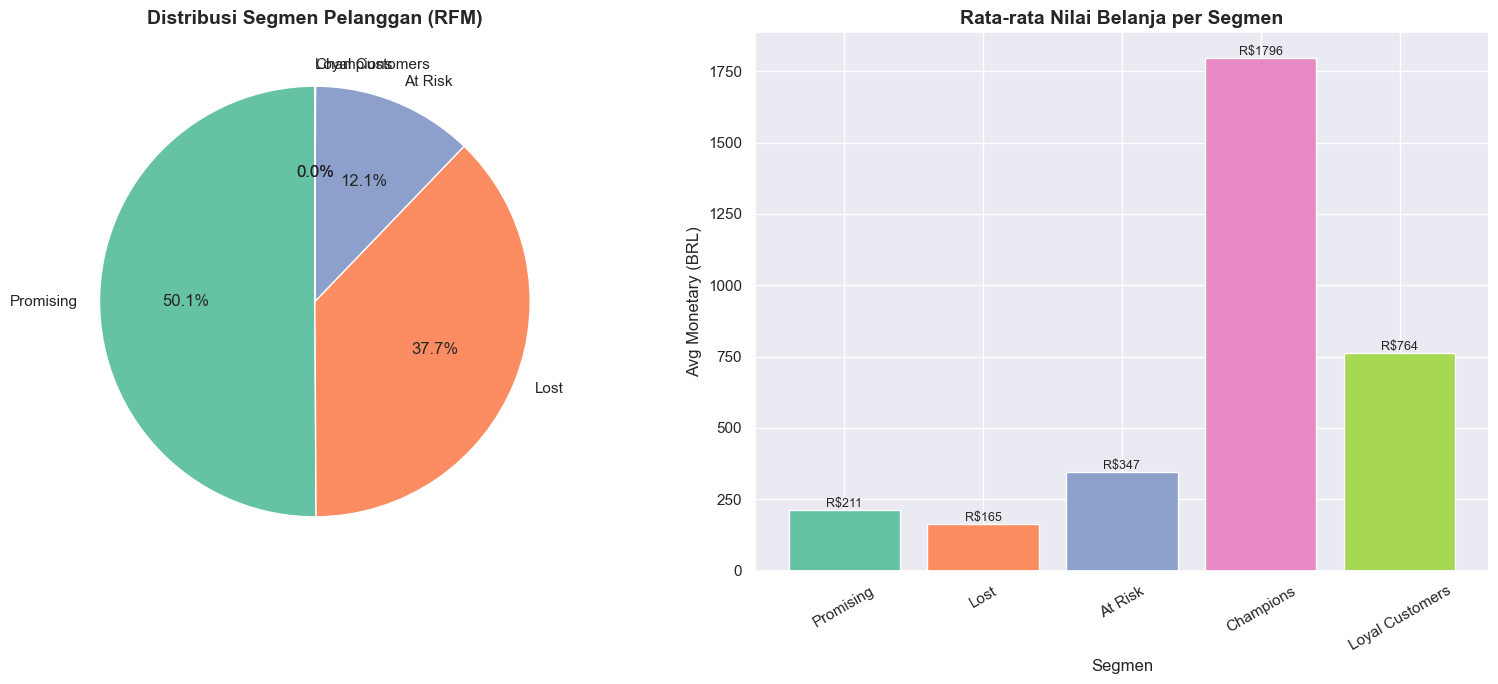

        segment  jumlah_pelanggan  avg_recency  avg_frequency  avg_monetary
      Promising             46434       112.09           1.03        211.46
           Lost             34979       335.63           1.03        164.63
        At Risk             11249       452.34           1.05        346.81
      Champions                37        97.97           5.11       1796.21
Loyal Customers                 6       289.83           4.17        763.62


In [18]:
segment_summary = rfm_df.groupby('segment').agg(
    jumlah_pelanggan=('customer_unique_id', 'count'),
    avg_recency=('recency', 'mean'),
    avg_frequency=('frequency', 'mean'),
    avg_monetary=('monetary', 'mean')
).round(2).reset_index().sort_values('jumlah_pelanggan', ascending=False)

fig, axes = plt.subplots(1, 2, figsize=(16, 7))

# Pie chart distribusi segmen
colors = sns.color_palette('Set2', len(segment_summary))
axes[0].pie(segment_summary['jumlah_pelanggan'],
            labels=segment_summary['segment'],
            autopct='%1.1f%%',
            colors=colors,
            startangle=90)
axes[0].set_title('Distribusi Segmen Pelanggan (RFM)', fontsize=14, fontweight='bold')

# Bar chart avg monetary per segmen
bars = axes[1].bar(segment_summary['segment'], segment_summary['avg_monetary'],
                   color=colors)
axes[1].set_title('Rata-rata Nilai Belanja per Segmen', fontsize=14, fontweight='bold')
axes[1].set_xlabel('Segmen')
axes[1].set_ylabel('Avg Monetary (BRL)')
axes[1].tick_params(axis='x', rotation=30)
for bar in bars:
    axes[1].text(bar.get_x() + bar.get_width()/2, bar.get_height(),
                 f"R${bar.get_height():.0f}", ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.savefig('plot_q2_rfm_segment.png', dpi=150, bbox_inches='tight')
plt.show()
print(segment_summary.to_string(index=False))

**Insight:**
- Segmen `Promising` mendominasi lebih dari 50% total pelanggan, menunjukkan sebagian besar customer masih berada pada tahap awal lifecycle dan memiliki potensi besar untuk dikembangkan menjadi pelanggan loyal.
- Segmen `Lost` juga sangat besar (±37.7%), mengindikasikan tingkat churn yang tinggi dan perlunya strategi reaktivasi seperti promo khusus atau campaign retargeting.
- Segmen `Champions` memiliki rata-rata nilai belanja (avg_monetary) paling tinggi (~R$1796) dan frekuensi tertinggi (5.11), namun jumlahnya sangat kecil. Ini adalah pelanggan paling bernilai dan harus dipertahankan dengan program loyalty eksklusif.
- `Loyal Customers` juga memiliki avg_monetary tinggi (~R$764) dan frekuensi cukup besar (4.17), menunjukkan kontribusi revenue yang stabil meskipun jumlahnya sangat sedikit.
- Segmen `At Risk` memiliki nilai belanja cukup tinggi (~R$347) namun recency sangat besar (452 hari), artinya mereka dulu bernilai tetapi sudah lama tidak bertransaksi — ini adalah target utama untuk win-back campaign.
- Secara keseluruhan, struktur pelanggan menunjukkan revenue besar berasal dari segmen kecil (Champions & Loyal), sementara mayoritas populasi berada di tahap awal atau sudah churn, sehingga strategi bisnis perlu fokus pada retensi dan konversi segmen `Promising` menjadi pelanggan loyal.

### Pertanyaan 3: Tren Bulanan

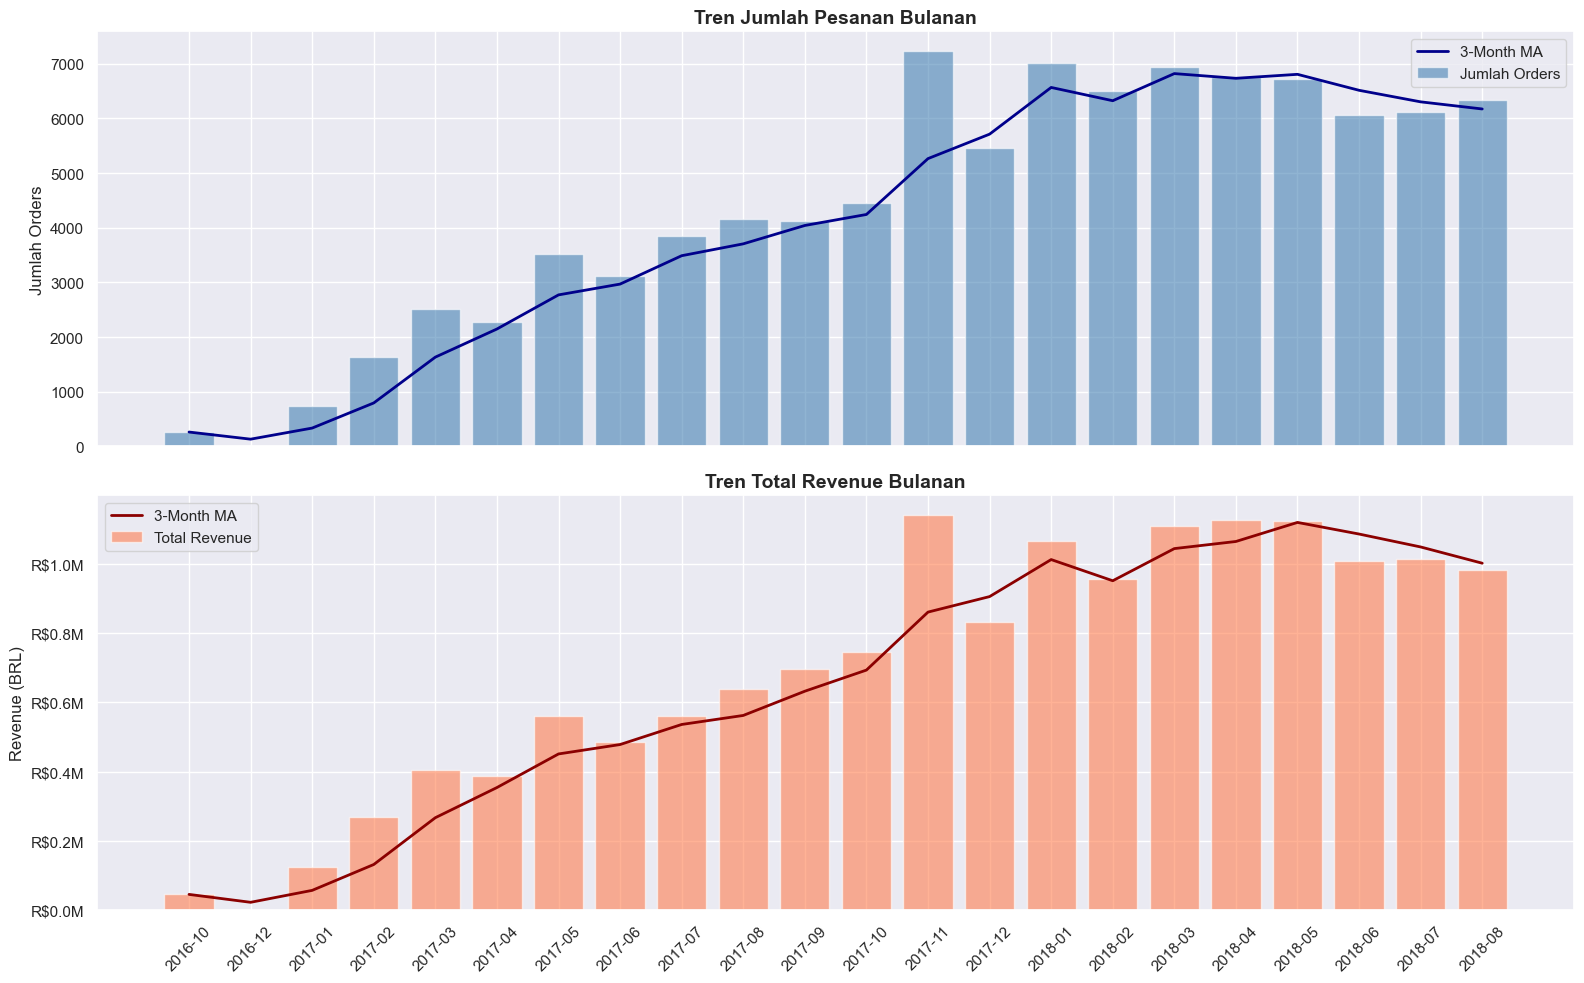

In [19]:
fig, axes = plt.subplots(2, 1, figsize=(16, 10), sharex=True)

# Tren jumlah orders
axes[0].bar(monthly_trend['year_month_str'], monthly_trend['total_orders'],
            color='steelblue', alpha=0.6, label='Jumlah Orders')
axes[0].plot(monthly_trend['year_month_str'], monthly_trend['orders_MA3'],
             color='darkblue', linewidth=2, label='3-Month MA')
axes[0].set_title('Tren Jumlah Pesanan Bulanan', fontsize=14, fontweight='bold')
axes[0].set_ylabel('Jumlah Orders')
axes[0].legend()
axes[0].tick_params(axis='x', rotation=45)

# Tren revenue
axes[1].bar(monthly_trend['year_month_str'], monthly_trend['total_revenue'],
            color='coral', alpha=0.6, label='Total Revenue')
axes[1].plot(monthly_trend['year_month_str'], monthly_trend['revenue_MA3'],
             color='darkred', linewidth=2, label='3-Month MA')
axes[1].set_title('Tren Total Revenue Bulanan', fontsize=14, fontweight='bold')
axes[1].set_ylabel('Revenue (BRL)')
axes[1].yaxis.set_major_formatter(mticker.FuncFormatter(lambda x, _: f'R${x/1e6:.1f}M'))
axes[1].legend()
axes[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.savefig('plot_q3_monthly_trend.png', dpi=150, bbox_inches='tight')
plt.show()

**Insight:**
- Terlihat tren pertumbuhan yang sangat kuat dari akhir 2016 hingga awal 2018, baik dari sisi jumlah pesanan maupun total revenue.
- Lonjakan signifikan terjadi pada periode akhir 2017 (sekitar Oktober–Desember), yang kemungkinan dipengaruhi oleh event besar seperti campaign promosi atau momentum belanja akhir tahun.
- Moving Average (3-Month MA) menunjukkan tren naik yang konsisten hingga mencapai puncaknya di awal hingga pertengahan 2018.
- Setelah mencapai puncak pada sekitar April–Mei 2018, terlihat adanya penurunan bertahap baik pada jumlah pesanan maupun revenue hingga Agustus 2018.
- Pola revenue sangat sejalan dengan pola jumlah pesanan, menunjukkan bahwa pertumbuhan pendapatan terutama didorong oleh peningkatan volume transaksi, bukan kenaikan signifikan pada nilai rata-rata per order.
- Secara keseluruhan, bisnis menunjukkan fase growth yang agresif selama 2017 hingga awal 2018, diikuti fase stabilisasi/penyesuaian pada pertengahan 2018.

### Pertanyaan 4: Metode Pembayaran

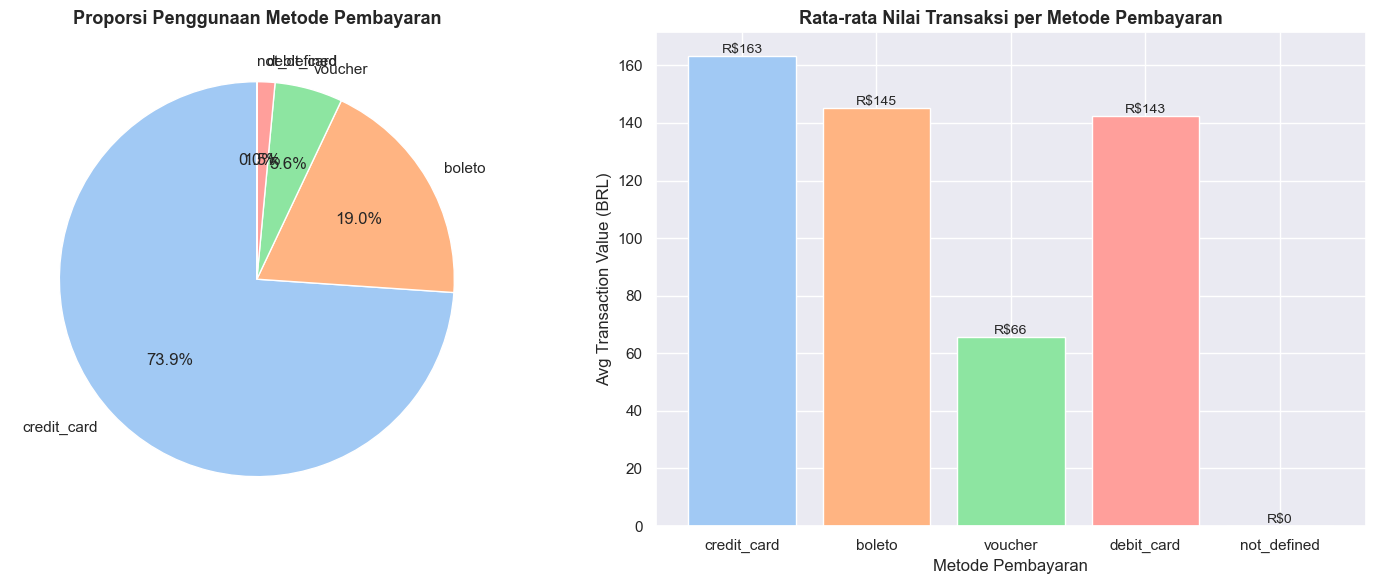

In [20]:
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Dominasi frekuensi
colors_pay = sns.color_palette('pastel', len(payment_freq))
axes[0].pie(payment_freq['count'], labels=payment_freq['payment_type'],
            autopct='%1.1f%%', colors=colors_pay, startangle=90)
axes[0].set_title('Proporsi Penggunaan Metode Pembayaran', fontsize=13, fontweight='bold')

# Rata-rata nilai transaksi
bars = axes[1].bar(payment_freq['payment_type'], payment_freq['avg_value'],
                   color=colors_pay)
axes[1].set_title('Rata-rata Nilai Transaksi per Metode Pembayaran', fontsize=13, fontweight='bold')
axes[1].set_ylabel('Avg Transaction Value (BRL)')
axes[1].set_xlabel('Metode Pembayaran')
for bar in bars:
    axes[1].text(bar.get_x() + bar.get_width()/2, bar.get_height(),
                 f"R${bar.get_height():.0f}", ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.savefig('plot_q4_payment_method.png', dpi=150, bbox_inches='tight')
plt.show()

**Insight:**
- Credit card mendominasi dengan lebih dari 70% transaksi.
- Voucher memiliki rata-rata nilai transaksi yang lebih rendah — sesuai fungsinya sebagai diskon.

### Pertanyaan 5: Korelasi Waktu Pengiriman & Review Score

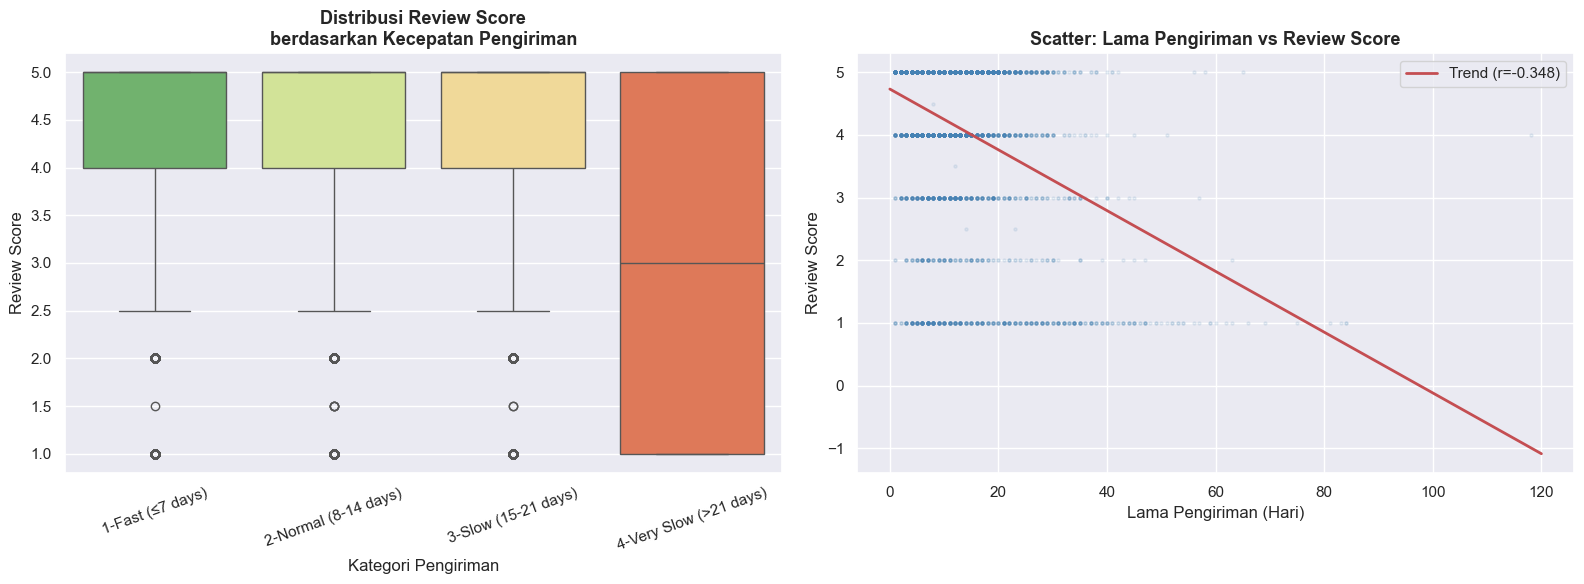

Pearson Correlation: -0.3476 (negatif lemah — terdapat hubungan negatif)


In [21]:
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Box plot per kategori pengiriman
order_cat = ['1-Fast (≤7 days)', '2-Normal (8-14 days)', '3-Slow (15-21 days)', '4-Very Slow (>21 days)']
delivery_review_sorted = delivery_review[delivery_review['delivery_category'].isin(order_cat)]

sns.boxplot(data=delivery_review_sorted, x='delivery_category', y='review_score',
            order=order_cat, palette='RdYlGn_r', ax=axes[0])
axes[0].set_title('Distribusi Review Score\nberdasarkan Kecepatan Pengiriman', fontsize=13, fontweight='bold')
axes[0].set_xlabel('Kategori Pengiriman')
axes[0].set_ylabel('Review Score')
axes[0].tick_params(axis='x', rotation=20)

# Scatter plot dengan regression line (sample untuk kecepatan)
sample_dr = delivery_review.sample(min(5000, len(delivery_review)), random_state=42)
axes[1].scatter(sample_dr['delivery_days'], sample_dr['review_score'],
                alpha=0.1, color='steelblue', s=5)

# Trend line
z = np.polyfit(sample_dr['delivery_days'], sample_dr['review_score'], 1)
p = np.poly1d(z)
x_line = np.linspace(0, 120, 100)
axes[1].plot(x_line, p(x_line), 'r-', linewidth=2, label=f'Trend (r={corr:.3f})')
axes[1].set_title('Scatter: Lama Pengiriman vs Review Score', fontsize=13, fontweight='bold')
axes[1].set_xlabel('Lama Pengiriman (Hari)')
axes[1].set_ylabel('Review Score')
axes[1].legend()

plt.tight_layout()
plt.savefig('plot_q5_delivery_review.png', dpi=150, bbox_inches='tight')
plt.show()
print(f"Pearson Correlation: {corr:.4f} (negatif lemah — terdapat hubungan negatif)")

**Insight:**
- Korelasi negatif terbukti: pengiriman lebih cepat → review score lebih tinggi.
- Pengiriman >21 hari secara konsisten mendapat review rendah (median ≈ 3).
- Mempercepat pengiriman adalah salah satu cara paling efektif meningkatkan kepuasan pelanggan.

## Analisis Lanjutan (Opsional)

In [22]:
import os
os.makedirs('dashboard', exist_ok=True)

# Simpan dataset yang dibutuhkan dashboard
revenue_by_category.to_csv('dashboard/revenue_by_category.csv', index=False)
rfm_df.to_csv('dashboard/rfm_df.csv', index=False)
monthly_trend.to_csv('dashboard/monthly_trend.csv', index=False)
payment_freq.to_csv('dashboard/payment_freq.csv', index=False)
delivery_review.to_csv('dashboard/delivery_review.csv', index=False)
main_df.to_csv('dashboard/main_df.csv', index=False)

print("Semua data berhasil disimpan ke folder 'dashboard/'")
print("File yang tersimpan:")
for f in os.listdir('dashboard'):
    print(f"  - {f}")

Semua data berhasil disimpan ke folder 'dashboard/'
File yang tersimpan:
  - delivery_review.csv
  - main_df.csv
  - monthly_trend.csv
  - payment_freq.csv
  - revenue_by_category.csv
  - rfm_df.csv


## Conclusion

- **Pertanyaan 1:** Kategori `health_beauty` dan `watches_gifts` menghasilkan revenue tertinggi. Strategi: fokus promosi dan stok pada kategori ini. Kategori revenue rendah perlu evaluasi apakah akan dikembangkan atau dihentikan.

- **Pertanyaan 2:** Mayoritas pelanggan masuk segmen 'Lost' — menunjukkan rendahnya retensi. Segmen 'Champions' (kecil namun bernilai tinggi) harus diprioritaskan dengan program loyalitas. Program win-back perlu disiapkan untuk segmen 'At Risk'.

- **Pertanyaan 3:** Bisnis menunjukkan tren pertumbuhan positif 2016-2018 dengan puncak di Nov 2017. Fluktuasi musiman terlihat jelas — peluang perencanaan promosi berbasis seasonality.

- **Pertanyaan 4:** Kartu kredit mendominasi (>70%) — sediakan opsi cicilan yang menarik. Boleto tetap relevan sebagai alternatif untuk segmen tanpa kartu kredit.

- **Pertanyaan 5:** Terdapat korelasi negatif antara lama pengiriman dan kepuasan pelanggan. Pengiriman ≤7 hari menghasilkan skor review tertinggi. Investasi pada logistik dan kecepatan pengiriman langsung berdampak pada kepuasan pelanggan.